<a href="https://colab.research.google.com/github/ashishdhawas/Retail-Customer-Segmentation/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :  Retail Customer Segmentation**

# Problem Description

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Data Description

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

# Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [20]:
import datetime
import scipy
import scipy.stats as stat

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data loading

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [26]:
df.shape

(541909, 8)

The shape of the dataset is 541909 rows and 8 columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Check Null Values**

In [28]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In the Description and CustomerID columns have null values so I decided to remove this null values

In [29]:
df.dropna(inplace=True)

**Check Duplicates**

In [30]:
df.duplicated().sum()

5225

In [31]:
# dropping ALL duplicte values
df.drop_duplicates(keep = False, inplace = True)

In [32]:
df.shape

(396767, 8)

After removing null values and duplicate values the new shape of the dataset is 396767 rows and 8 columns

In [33]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,396767.000000,396767.000000,396767.000000
mean,12.298913,3.487053,15275.108517
std,251.781170,70.187448,1714.401947
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13919.000000
50%,5.000000,1.950000,15132.000000
75%,12.000000,3.750000,16779.000000
max,80995.000000,38970.000000,18287.000000


In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [35]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# EDA

**Number of unique values in each columns**

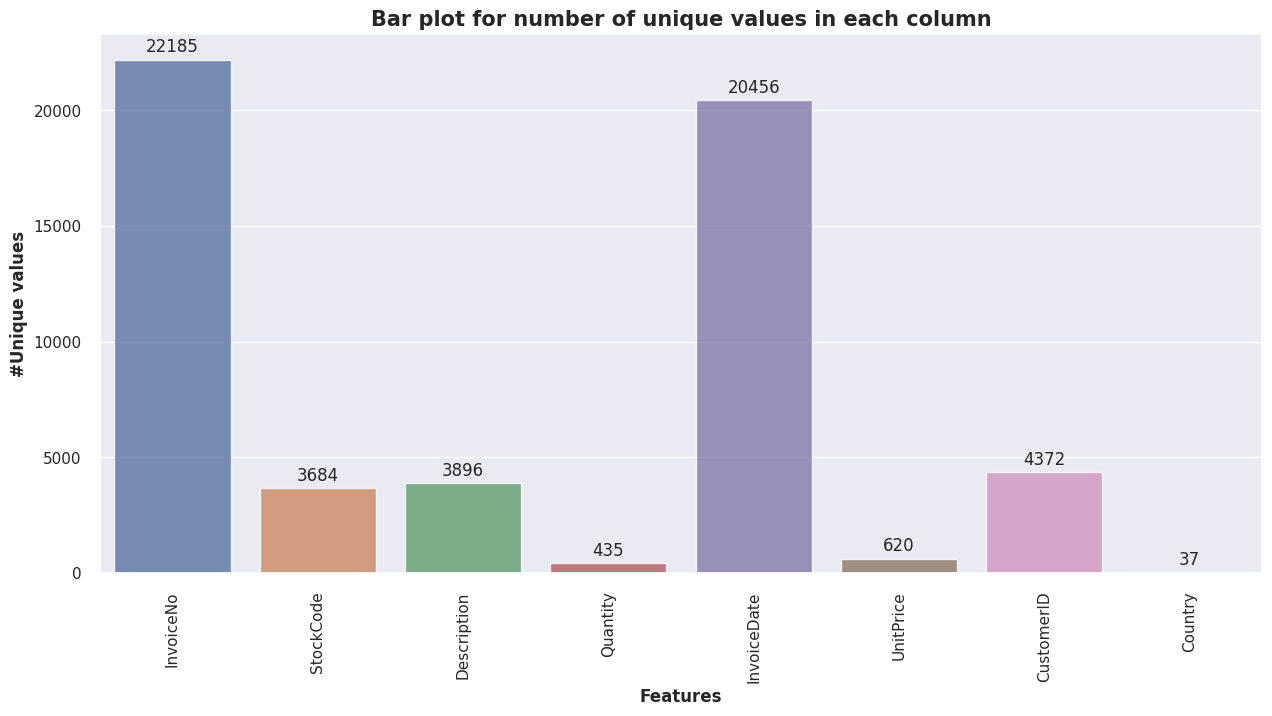

In [36]:
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Customer distribution in 1 year time period**

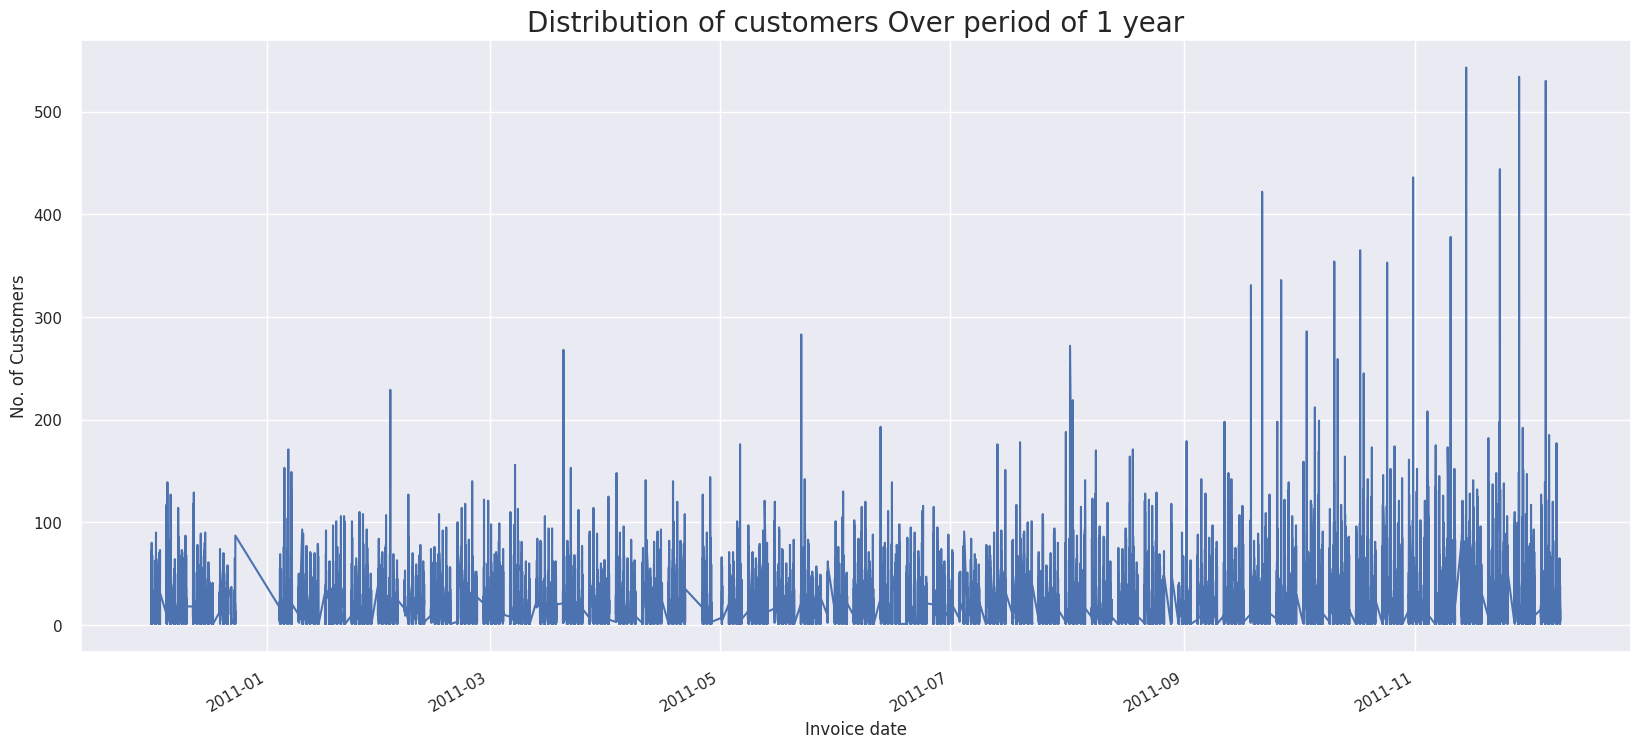

In [37]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=20)
plt.xlabel('Invoice date', size=12)
plt.ylabel('No. of Customers', size=12)
plt.show()

**Country count on the basis of InvoceNo.**

In [38]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [39]:
country_count.head()

,Country,InvoiceNo
0,Australia,1257
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32


In [40]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

,Country,InvoiceNo
0,United Kingdom,351964
1,Germany,9465
2,France,8459
3,EIRE,7465
4,Spain,2523
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1463
9,Australia,1257


In [41]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()

**Plotting graph for top 10 countries**

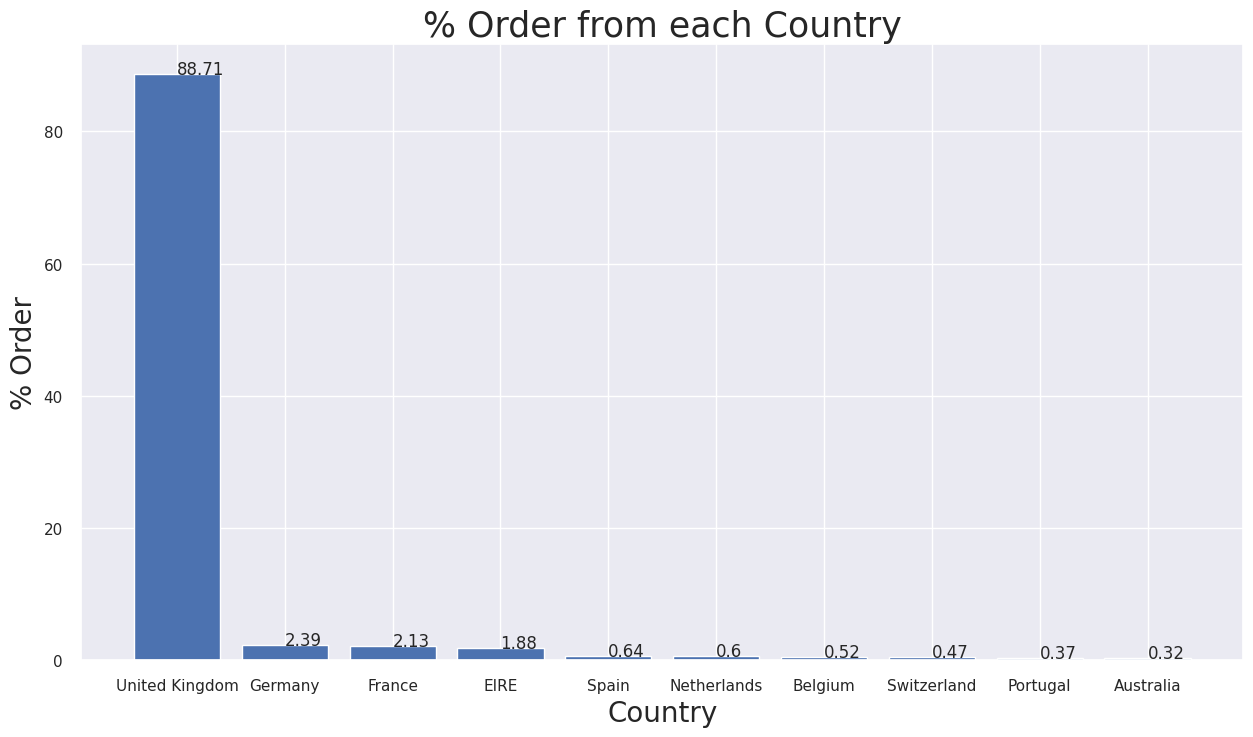

In [42]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=25)

## Showing the plot
plt.show()

**Checking for cancelled orders**

Given in the description that InvoiceNo is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  

Let us now look at the number of canceled orders in the data.

In [43]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [44]:
cancel_order.shape

(8844, 8)

In [45]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.229016021997797

This shows that 8844 (approx 2.22%) were such orders which was cancelled.

In [46]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [47]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7474
1,Germany,453
2,EIRE,247
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


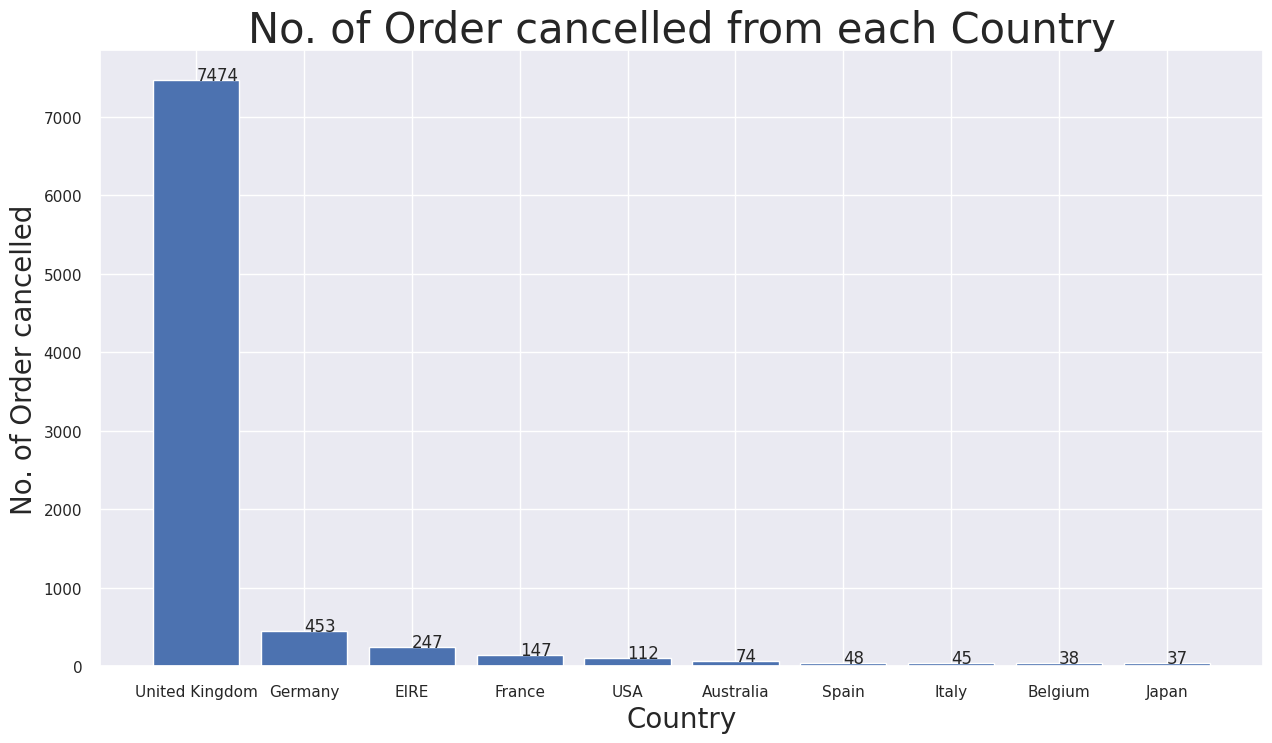

In [48]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

So I decided to ignore the cancelled order from the dataset

In [49]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [50]:
df.shape

(387923, 8)

# **Customer's data**

In [51]:
cs_df = df.copy()

In [52]:
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice

Calculate the total amount for each customer and create the amount column in the dataset

In [53]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [54]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


<Axes: xlabel='CustomerID', ylabel='amount'>

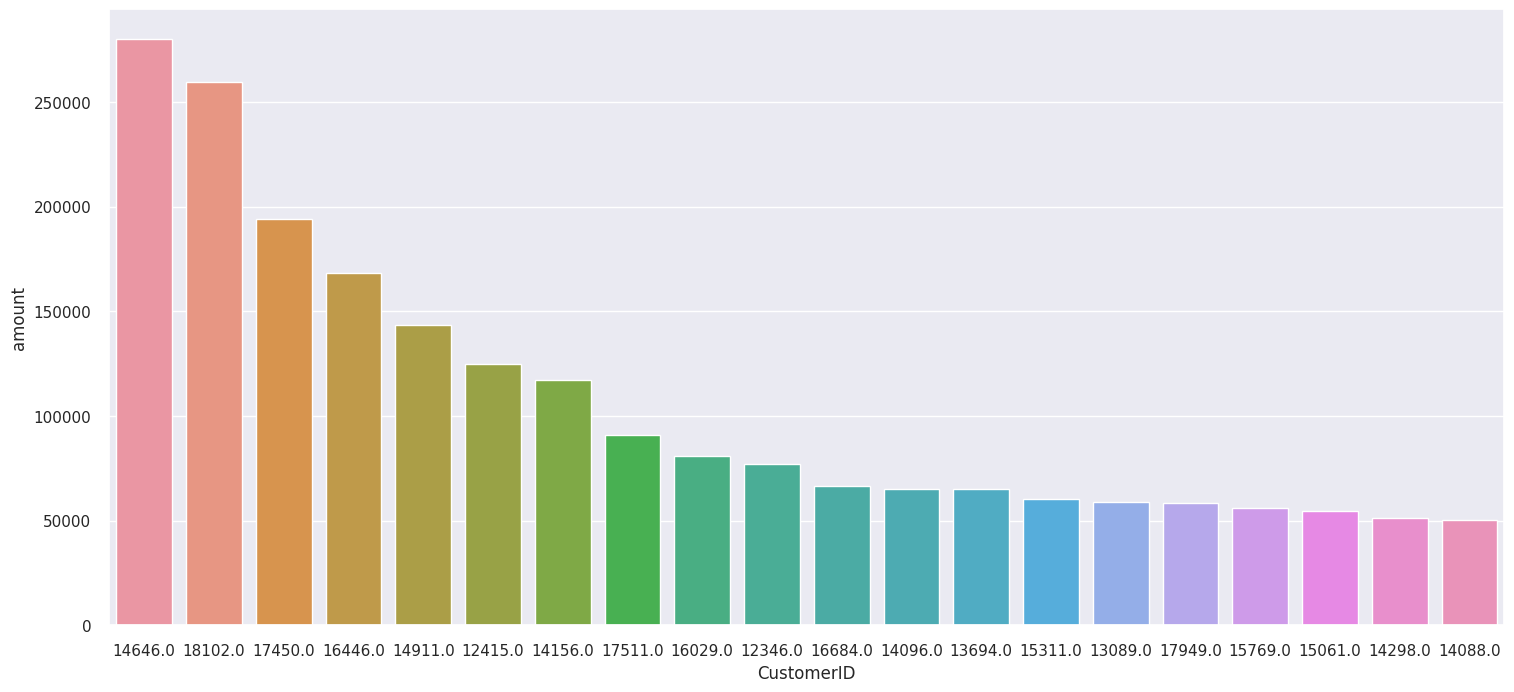

In [55]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

# Top products

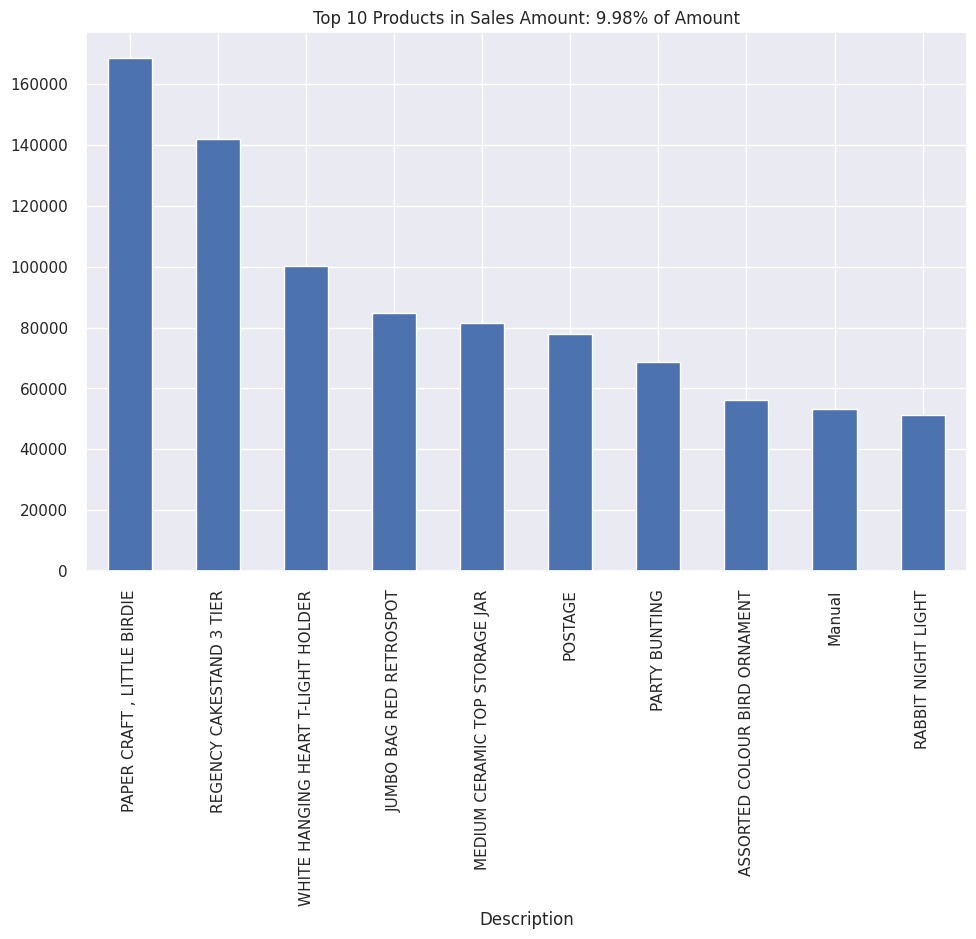

In [56]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

# Check the Distribution

<Axes: title={'center': 'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

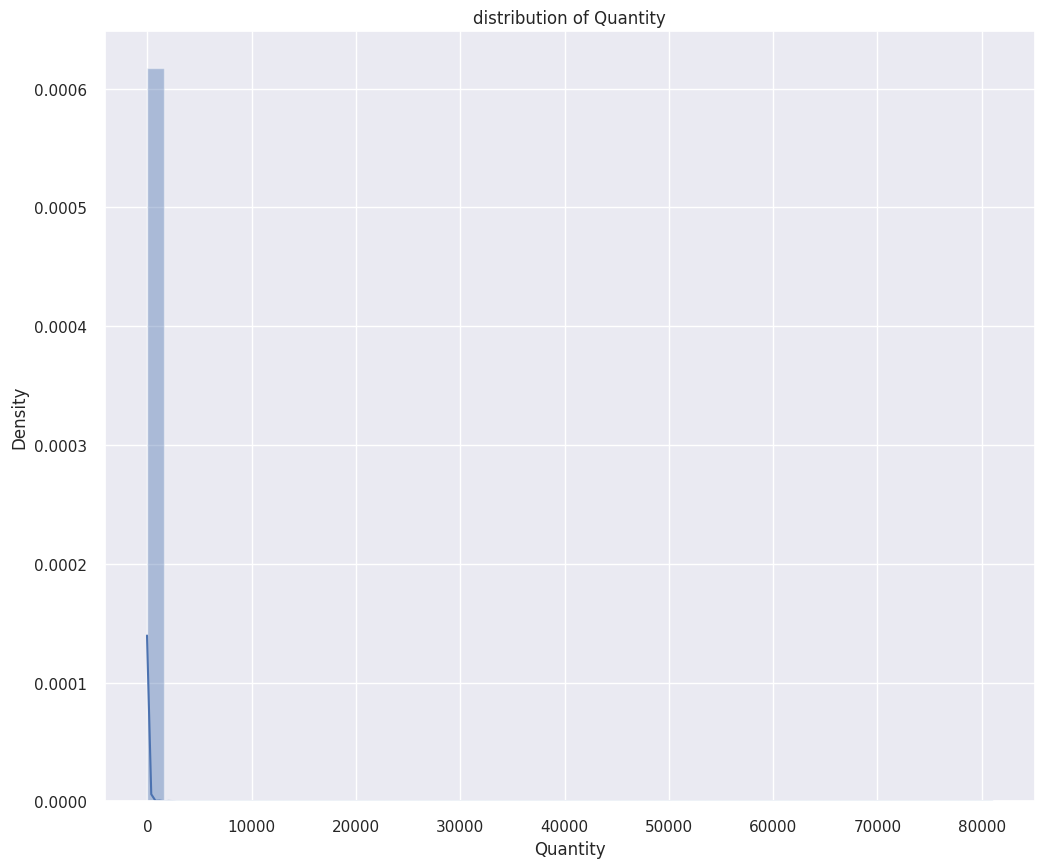

In [58]:
#distribution of Quantity
plt.figure(figsize=(12,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'])

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

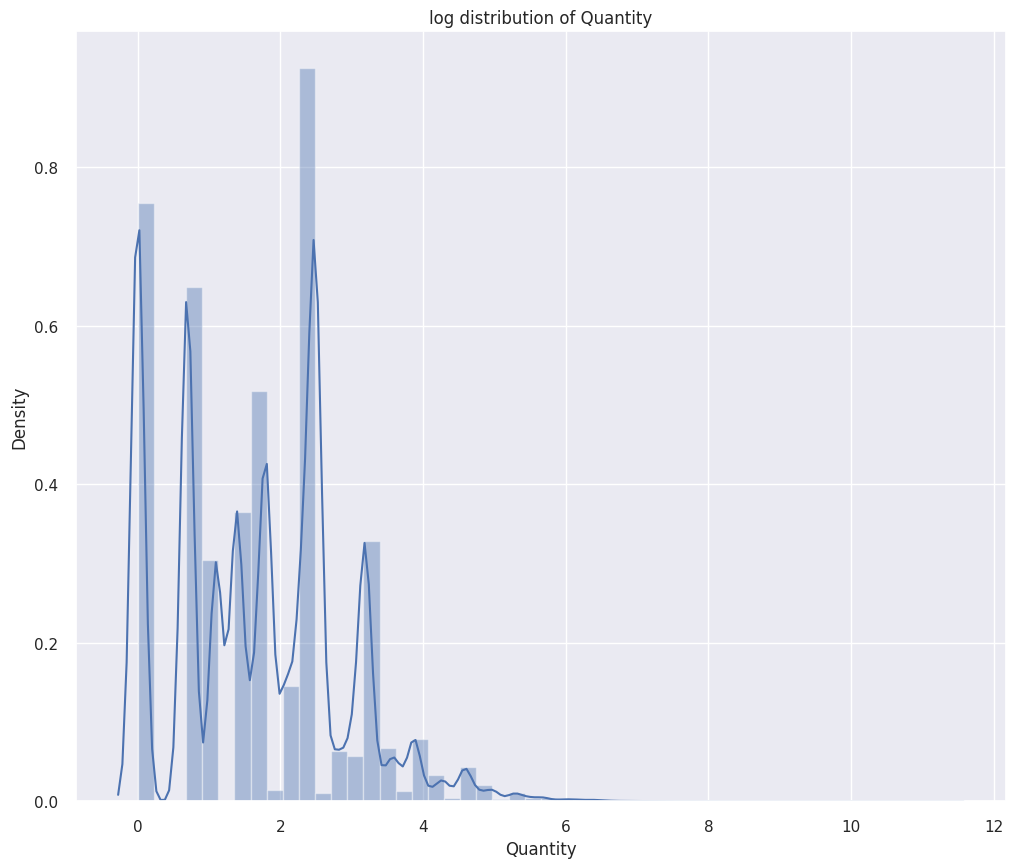

In [59]:
plt.figure(figsize=(12,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

<Axes: title={'center': 'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

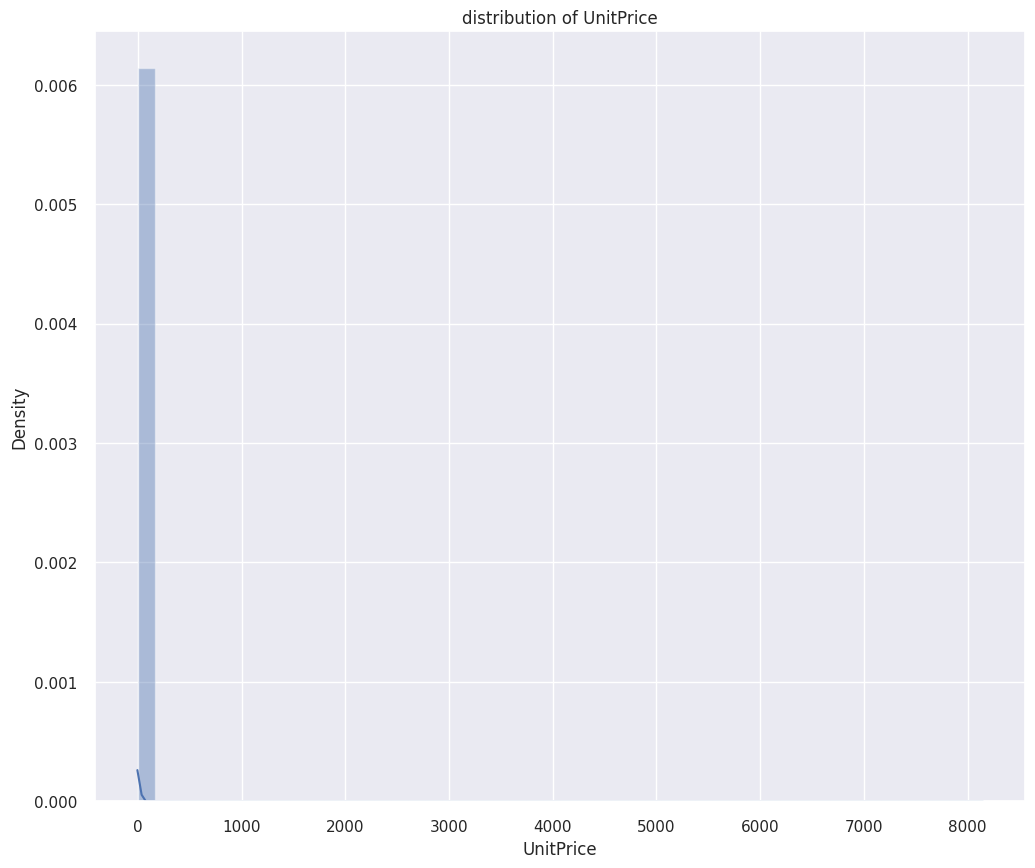

In [63]:
#distribution of UnitPrice
plt.figure(figsize=(12,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'])

# Feature engineering

In [64]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

Convert InvoiceDate columns into date time formate

Create a new features from Invoicedate

In [69]:
df['Day']=df['InvoiceDate'].dt.day_name()
df['Month']=df['InvoiceDate'].dt.month_name()
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [70]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,hour,minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,8,26,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,8,26,20.34,December


In [68]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

Create a new features TotalAmount form product of Quantity and Unitprice

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

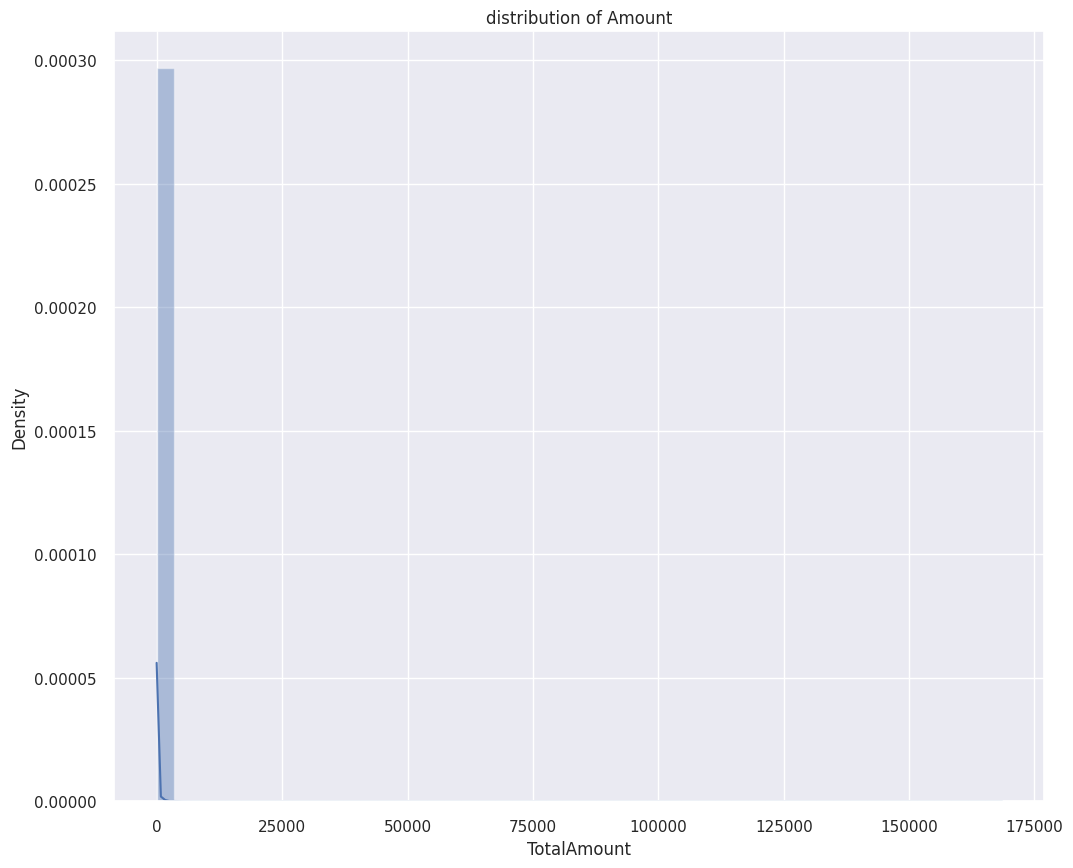

In [72]:
#distribution of TotalAmount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'])

In [73]:
df['TotalAmount'].describe()

count    387923.000000
mean         22.851873
std         312.997834
min           0.000000
25%           4.950000
50%          12.500000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

In [74]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,78514
1,Wednesday,67258
2,Tuesday,65072
3,Monday,63608
4,Sunday,59800
5,Friday,53671


<Axes: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

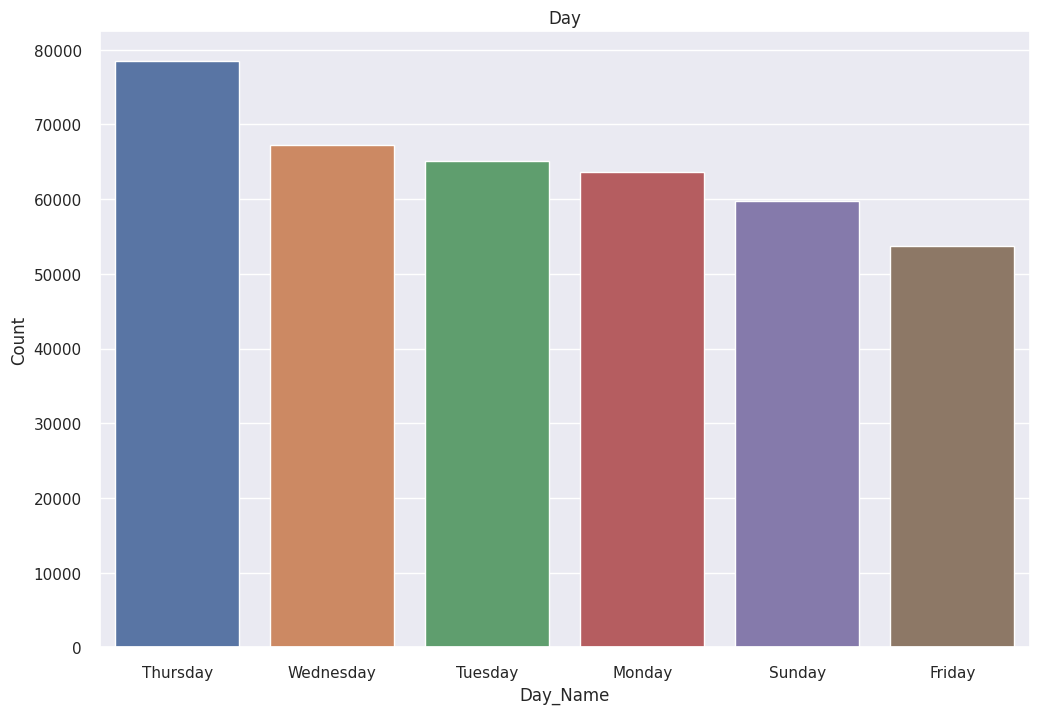

In [75]:
plt.figure(figsize=(12,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Most of the customers have purches the items in Thursday ,Wednesday and Tuesday


In [78]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,61914
1,October,48099
2,December,41999
3,September,39335
4,May,27840
5,June,26710
6,March,26592
7,August,26586
8,July,26344
9,April,22240


<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

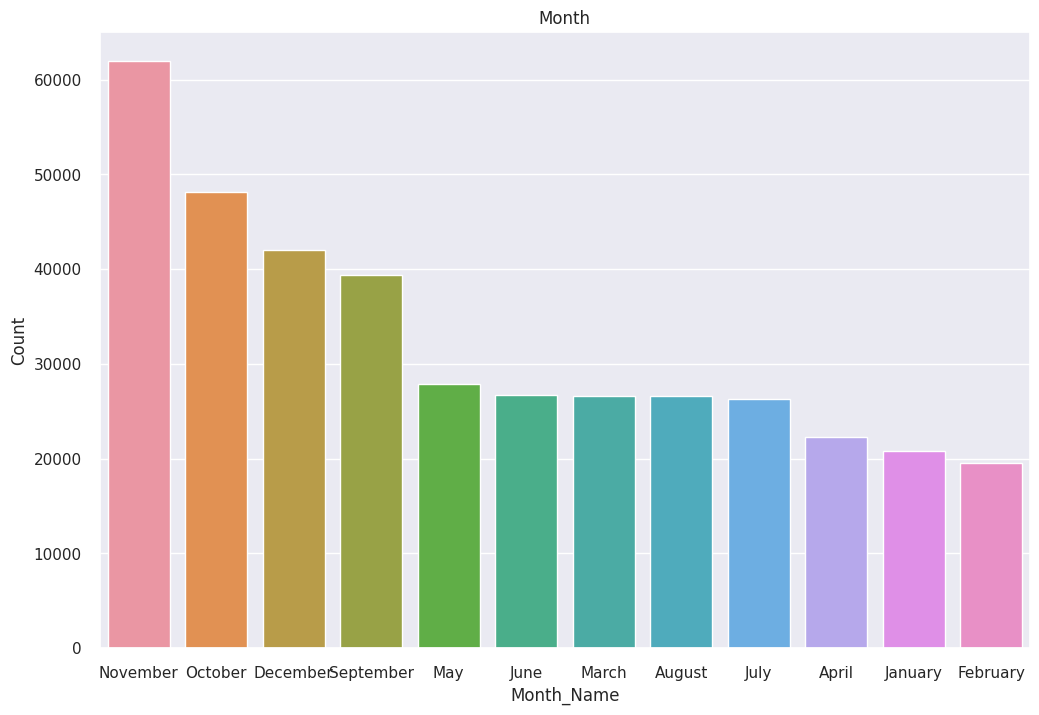

In [80]:
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

most numbers of customers have purches the gifts in the month of November, October, December and September

less numbers of customers have purches the gifts in the month of April, january and February

In [81]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,69889
1,13,62081
2,14,52465
3,11,47718
4,15,44253
5,10,37569
6,16,23381
7,9,21912
8,17,12814
9,8,8685


<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

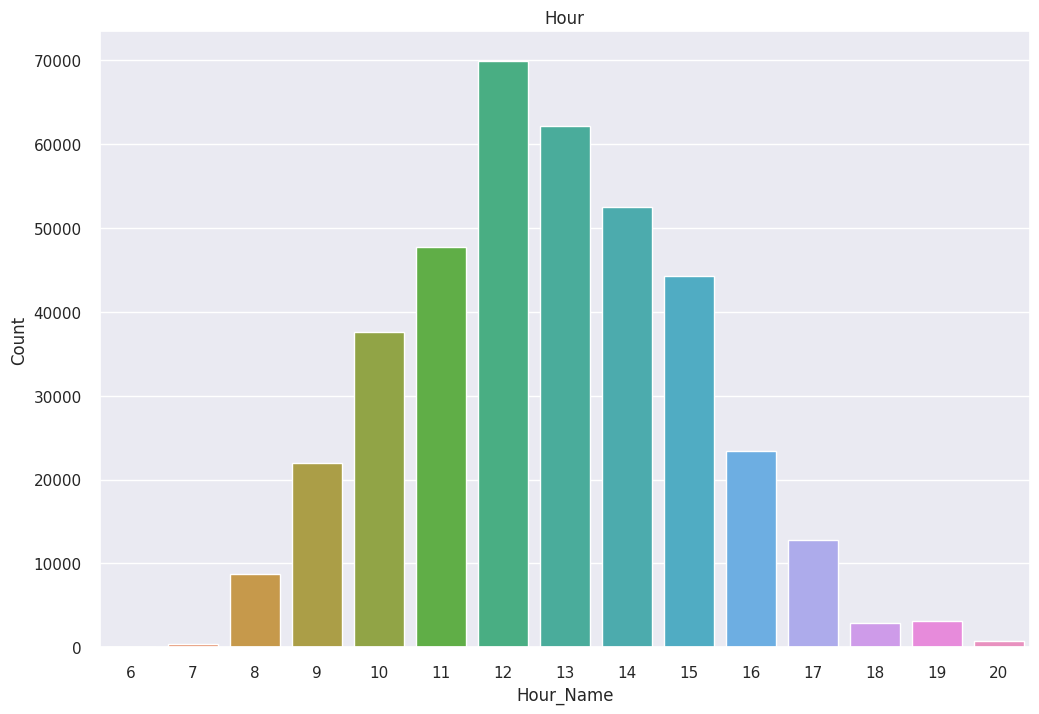

In [82]:
plt.figure(figsize=(12,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

From this graph we can see that in AfterNone Time most of the customers have purches the item.

In [83]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [84]:
df['Time_type']=df['hour'].apply(time_type)

<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

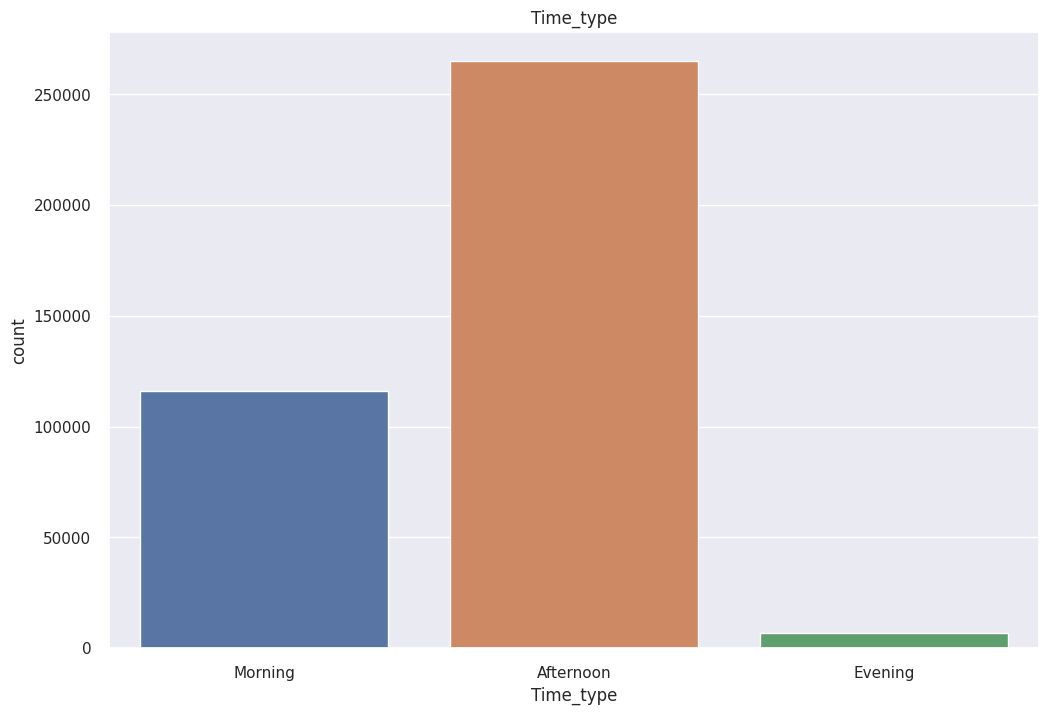

In [85]:
plt.figure(figsize=(12,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening

# Create the RFM model (Recency, Frequency,Monetary value)

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

Recency: How much days back customer visited the store

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on